In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import acquire_cindy as a
import acquire as acq
import prepare_cindy as prep

# Acquire

we are using the function in acquire.py to get a repo.

**Note : the repo name should not contain spaces**

I was working with a small size data to create prepare and explore

In [2]:
# repo_json_file = 'data2.json'
# df_github = pd.read_json(repo_json_file)

In [3]:
# df_github

In [4]:
#  df_github.to_csv('df.csv')

In [5]:
#df = pd.read_csv('df.csv', index_col=0)

In [6]:
# df

# acquire big data

In [7]:
 repo_json_file = 'data2.json'
 df_github = pd.read_json(repo_json_file)

In [8]:
df_github.head()

repo language  \
0                      jtleek/datasharing     None   
1           rdpeng/ProgrammingAssignment2        R   
2                     octocat/Spoon-Knife     HTML   
3                   tensorflow/tensorflow      C++   
4  SmartThingsCommunity/SmartThingsPublic   Groovy   

                                     readme_contents  
0  How to share data with a statistician\n=======...  
1  ### Introduction\n\nThis second programming as...  
2  ### Well hello there!\n\nThis repository is me...  
3  <div align="center">\n  <img src="https://www....  
4  # SmartThings Public GitHub Repo\n\nAn officia...

In [9]:
df_github.shape

(170, 3)

In [10]:
df_github.to_csv('git_urls.csv')

In [11]:
df = pd.read_csv('git_urls.csv', index_col=0)

In [12]:
df.shape

(170, 3)

# Prepare

in this section we are going to clean data:
- detect english language so we can have only information in english language (remove rows)
- check missing values. remove rows
- use my function that clean, steem
- remove al the programmin language that have observation ==1 (split error)
- in exploration IO realize that jupyter notebook was under language and it should be pyton

## detect language

In [ ]:
df.readme_contents[0]

install :
```
$ pip install -U textblob
$ python -m textblob.download_corpora
```
https://textblob.readthedocs.io/en/dev/install.html

In [ ]:
from textblob import TextBlob
text = df.readme_contents[0]
lang = TextBlob(text)
print(lang.detect_language())


In [ ]:
lang.detect_language()

In [ ]:
df

In [ ]:
# for n in range (0, len(df)):
#     text = df.readme_contents[n]
#     lang = TextBlob(text)
#     print(lang.detect_language())
#     if lang.detect_language() != 'en':
#         df =df.drop([n])
    

In [ ]:
df

In [ ]:
#create a function
def remove_nonenglish (df):
    '''
    takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    '''
    for n in range (0, len(df)):
        text = df.readme_contents[n]
        lang = TextBlob(text)
        print(lang.detect_language())
        if lang.detect_language() != 'en':
            df =df.drop([n])
    return df

In [ ]:
df = remove_nonenglish(df)

In [ ]:
df

### missing values

In [ ]:
#check missing values using my function
miss_val =prep.miss_dup_values(df)
miss_val

**Note:  we can see we have missing values in language , so I'm going to remove the rows that have missing values in language**

In [ ]:
#removing missing values
df = df.dropna(axis=0).reset_index(drop=True)

### clean, tokenized, stemming, lemmatize

In [ ]:
#use my prepare function
df =prep.prepare_data(df, 'readme_contents')

In [ ]:
df.head()

___________

when I tried to  split into train, validate , test,  I got this Error:
ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

I'm going to remove the records that have unique language

In [ ]:
def remove_lang (df):
    '''
    takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    '''
    #create a df with the unique languages
    targ =pd.DataFrame(df[['language']].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':'language'})
    #get the list of the unique languiages
    lang2drop= list(targ.language[targ.cnt ==1].values)
    for n in range (0, len(df)):
        if df.language[n] in lang2drop:
            df =df.drop([n])
    return df.reset_index(drop = True)

In [ ]:
df.language.value_counts()

In [ ]:
# change jupyter notebook to python

In [ ]:
df['language'].replace('Jupyter Notebook', 'Python', inplace=True )

In [ ]:
df.language.value_counts()

## MAIN FUNCTION FOR PREPARE

In [ ]:
def prepare_mf (df):
    '''
    takes in a df and all the rows with missing information, non English text,
    and then clean, tokenize, stemming, lemmatize
    '''
    #removing missing values
    df = df.dropna(axis=0).reset_index(drop=True)
    #removing texts that are not English
    df = remove_nonenglish(df)

    #use my prepare function to  clean, tokenized, stemming, lemmatize
    df =prepare_data(df, 'readme_contents')

    #remove the rows with unique languages because we cannot use them when we split
    df = remove_lang (df)
    
    #replace Jupyter notebook by python
    df['language'].replace('Jupyter Notebook', 'Python', inplace=True )
    return df
    
    
    

In [13]:
df.shape

(170, 3)

In [14]:
#prepare data
df =prep.prepare_mf(df)

In [15]:
df.shape

(125, 6)

In [16]:
df.language.value_counts()

JavaScript    30
Python        25
Java          13
C++            9
TypeScript     8
HTML           7
Go             7
Ruby           6
C              5
Shell          4
Vue            3
PHP            3
Kotlin         3
CSS            2
Name: language, dtype: int64

In [17]:
#split train, validate and test
train, validate, test = prep.split_data(df, 'language')

complete df -> (125, 6)
train -> (70, 6)
validate -> (30, 6)
test -> (25, 6)


_____________

# Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?


### - What are the most common words in READMEs?

In [18]:
train.language.value_counts()

JavaScript    17
Python        14
Java           8
C++            5
HTML           4
TypeScript     4
Ruby           4
Go             4
C              3
Vue            2
Shell          2
CSS            1
PHP            1
Kotlin         1
Name: language, dtype: int64

In [19]:
#get the list of languages
list_lang = list(train.language.value_counts().index)

In [20]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = prep.basic_clean(' '.join(train[train.language == language].lemmatized))

#add allwords
join_text['all_words']= prep.basic_clean(' '.join(train.lemmatized))



In [21]:
#check if we have all the languages
join_text.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'HTML', 'TypeScript', 'Ruby', 'Go', 'C', 'Vue', 'Shell', 'CSS', 'PHP', 'Kotlin', 'all_words'])

In [22]:
#join_text['Ruby']

In [25]:
pd.Series(join_text['Ruby'].split()).value_counts()

swot                              17
university                        13
swotisacademic                    11
targetblankimg                    11
jekyll                            10
                                  ..
generate                           1
modification                       1
usagehttpsjekyllrbcomdocsusage     1
builtin                            1
used                               1
Length: 592, dtype: int64

**Represent text as word frequencies.**

In [26]:
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [33]:
word_counts.sort_values('all_words', ascending=False).head(30)

JavaScript  Python  Java  C++  HTML  TypeScript  Ruby  Go  C  \
apikey                2     341     0    0     0           0     0   0  0   
1                   176     113     2    0     3          14     0   6  0   
use                 122      63    17    3    26          17     5  21  3   
const               265       0     0    0     0           1     0   0  0   
data                 31     203     3    2     2           0     0  12  0   
code                 73      82    12   14     6          11     5  18  3   
api                  15     208     2    0     0           1     1   5  0   
function            223       2     0    0     0           0     0   0  0   
file                 62      42    14    3    39          21     1  22  3   
javascript          208       2     0    1     8           0     0   2  0   
project              45      35    20   14    11          26     3  13  3   
bad                 201       5     0    0     0           0     0   0  0   
good                186       5     3    0     0           0     2   0  2   
img                  90      37    23    0     0          12     0   1  0   
using                47      73    15    2    12           7     2  15  1   
see                  38      53    12    9    16           6     9  16  3   
open                 32      89     6    6     0           5     3   2  2   
page                 17      16     4    2    51           0     1   4  1   
run                  31      40    20    4     0          27     0  23  0   
test                 49      24     2   28     0          28     1  25  0   
build                43      24    31   10     2          20     4   8  2   
install              45      44     3    5     0          23     4   4  4   
2                    89      28     4    4     1           5     0   3  1   
make                 45      43     1    2     2          10     1  18  2   
p                    31      73     3    0     0          12     0   5  0   
also                 36      37     7    3    10           4     1  31  3   
return              124       9     2    0     0           0     0   0  0   
version              46      39     9    7     0          10     1  15  2   
aligncenter          78      39     3    0     0           6     0   0  0   
get                  36      43     8    4     7           6     4  15  2   

             Vue  Shell  CSS  PHP  Kotlin  all_words  
apikey         0      0    0    0       0        343  
1              2      1    4    0       0        321  
use            6      9    4    0       1        297  
const          1      0    0    0       0        267  
data           5      0    0    0       5        263  
code           4      3    2    2       0        235  
api            1      0    0    0       0        233  
function       4      1    0    0       0        230  
file           6      8    4    0       4        229  
javascript     0      0    0    1       0        222  
project       27      2    2    1       4        206  
bad            0      0    0    0       0        206  
good           3      1    0    0       0        202  
img           28      0    0    0       2        193  
using          0      2    5    0       3        184  
see            0      9    0    0       5        176  
open           4      8    2    0       4        163  
page          60      1    5    0       0        162  
run           10      4    1    0       1        161  
test           0      1    0    0       2        160  
build          3      0    3    0       0        150  
install        2     13    3    0       0        150  
2              5      1    4    0       0        145  
make           7      3    6    0       0        140  
p              7      1    0    3       2        137  
also           0      5    0    0       0        137  
return         0      0    0    0       0        135  
version        1      1    1    0       1        133  
aligncenter    3      0    0  

In [34]:
word_counts.shape

(5754, 15)

In [35]:
#vizualizacion most frequet words
def word_cloud (text):

    plt.figure(figsize=(10,10))
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

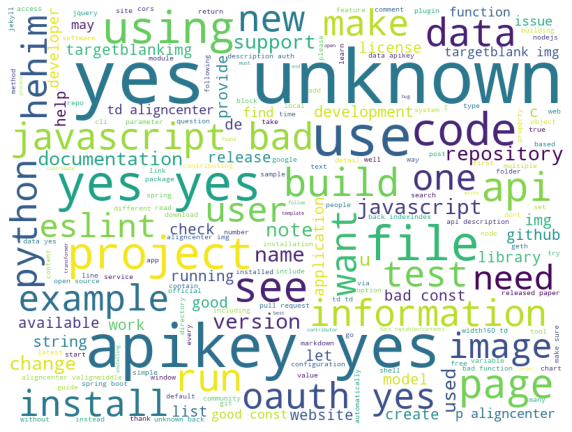

In [36]:
word_cloud(join_text['all_words'])

In [37]:
#what if I do only 30 words?
top_all =word_counts.sort_values('all_words', ascending=False)[['all_words']].head(30)

In [38]:
top_all

all_words
apikey             343
1                  321
use                297
const              267
data               263
code               235
api                233
function           230
file               229
javascript         222
project            206
bad                206
good               202
img                193
using              184
see                176
open               163
page               162
run                161
test               160
build              150
install            150
2                  145
make               140
p                  137
also               137
return             135
version            133
aligncenter        131
get                131

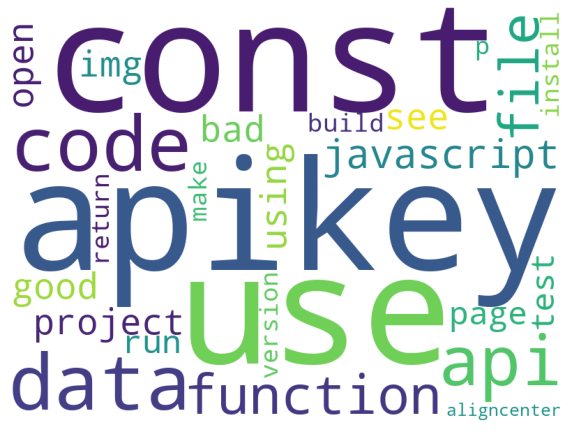

In [39]:
word_cloud(' '.join(top_all.index))

In [40]:
def wordcloud_top(df,column, n_top=30):
    top_all =df.sort_values(column, ascending=False)[[column]].head(n_top)
    word_cloud(' '.join(top_all.index))
    

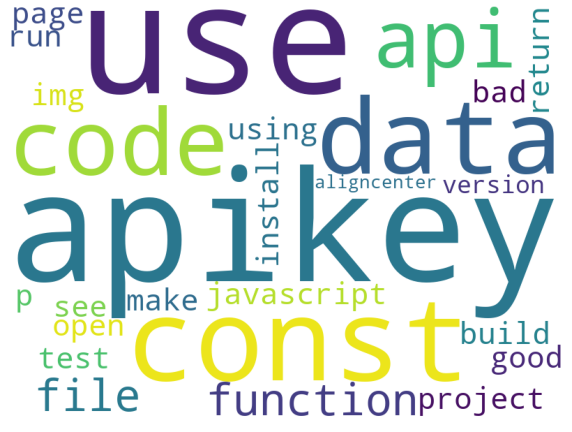

In [41]:
wordcloud_top(word_counts, 'all_words')

 ********************* Language : JavaScript *********************


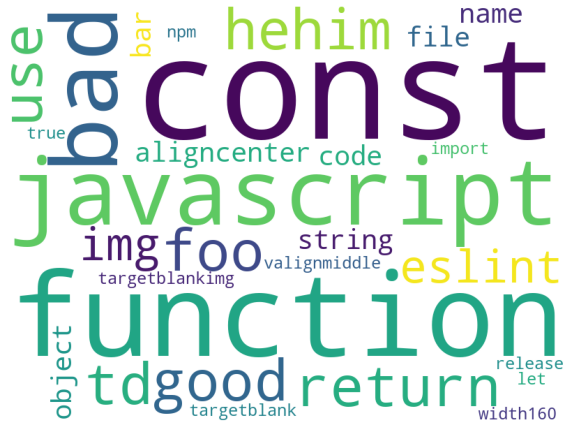

 
 ********************* Language : Python *********************


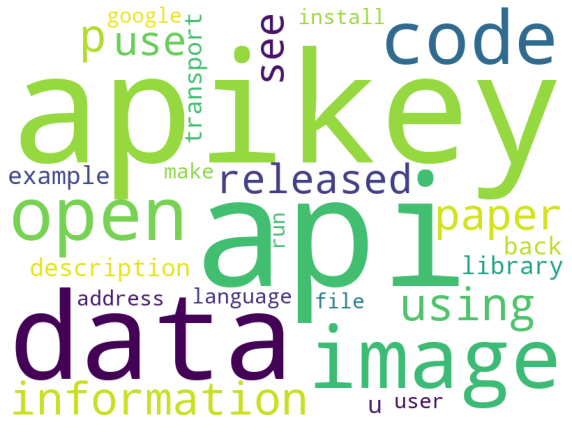

 
 ********************* Language : Java *********************


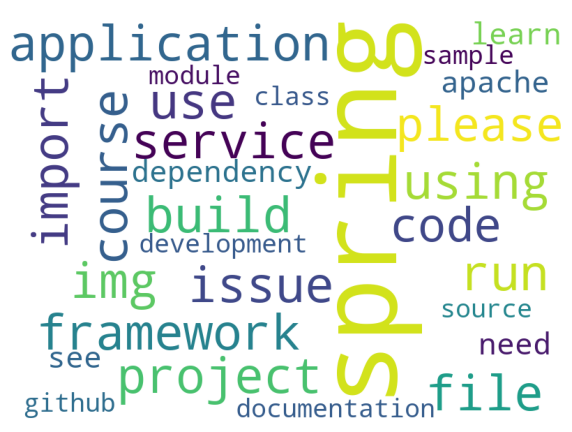

 
 ********************* Language : C++ *********************


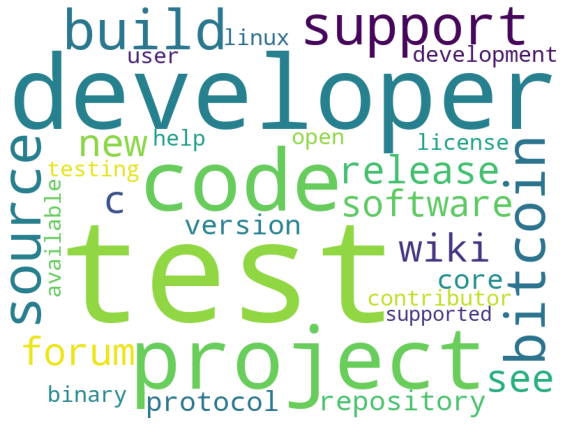

 
 ********************* Language : HTML *********************


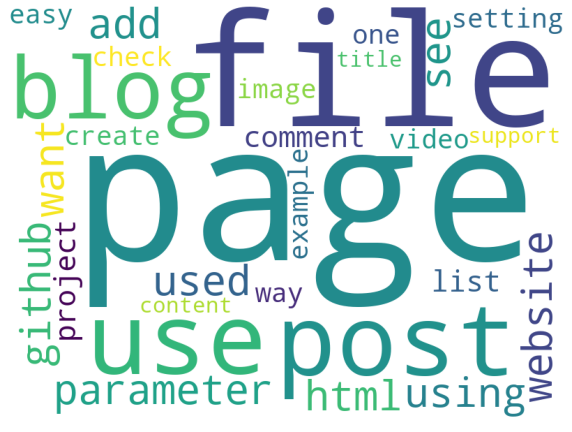

 
 ********************* Language : TypeScript *********************


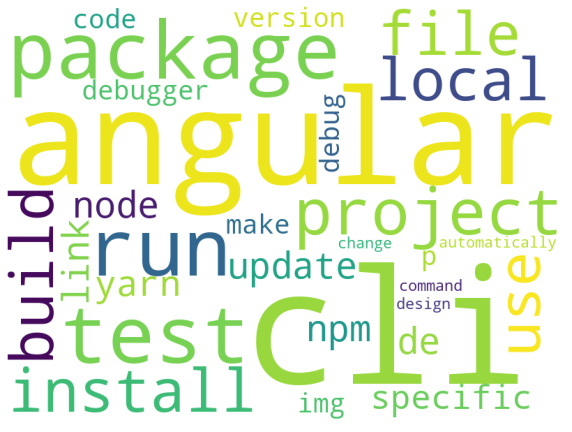

 
 ********************* Language : Ruby *********************


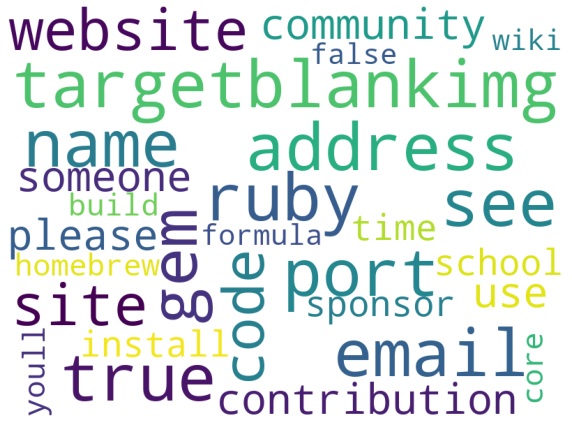

 
 ********************* Language : Go *********************


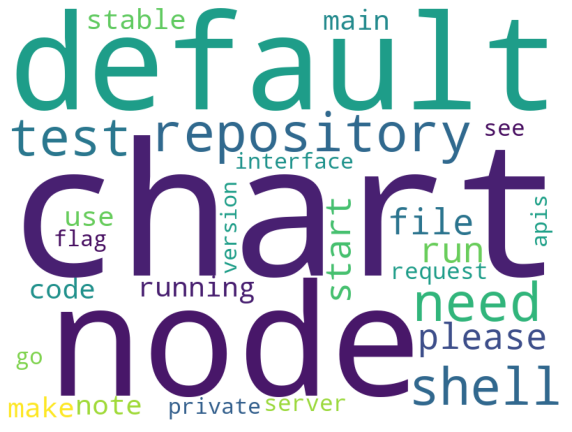

 
 ********************* Language : C *********************


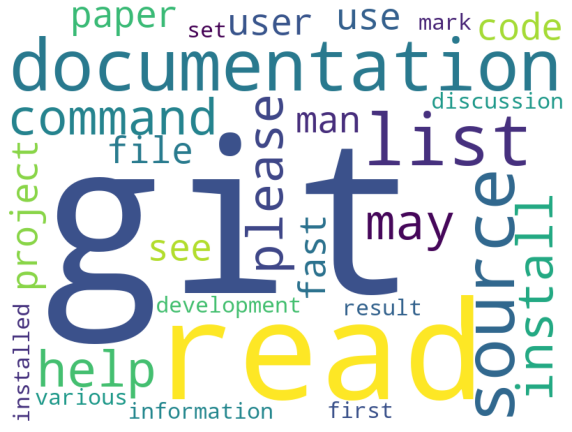

 
 ********************* Language : Vue *********************


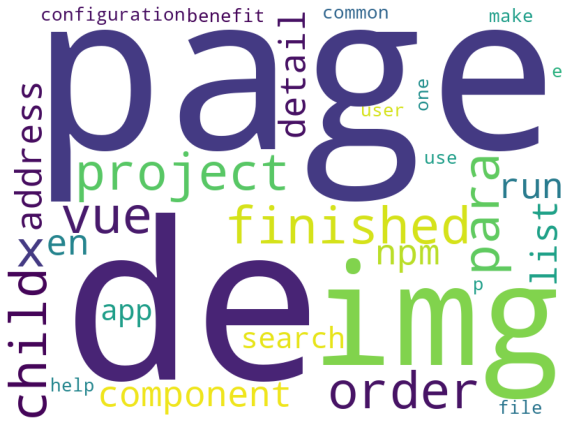

 
 ********************* Language : Shell *********************


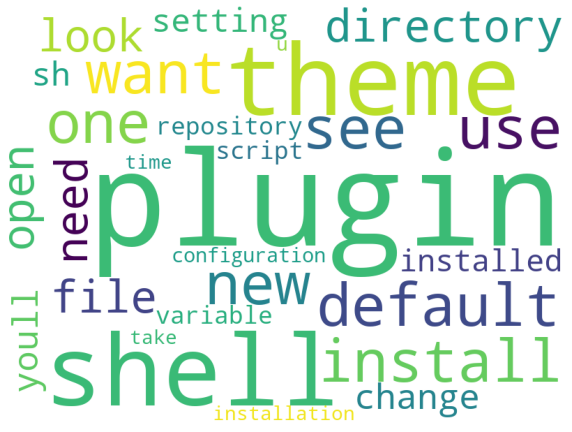

 
 ********************* Language : CSS *********************


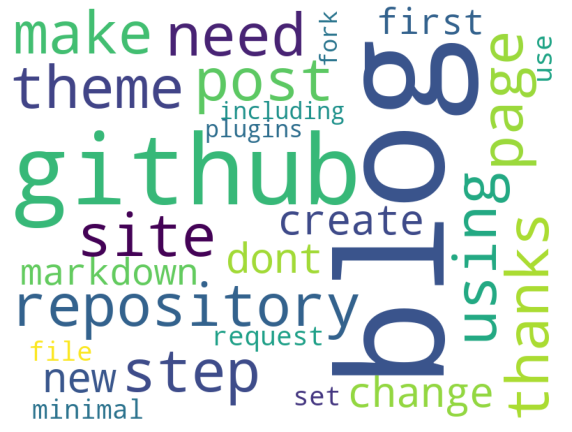

 
 ********************* Language : PHP *********************


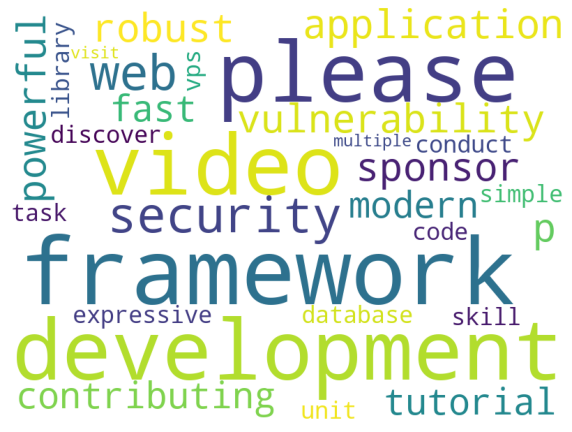

 
 ********************* Language : Kotlin *********************


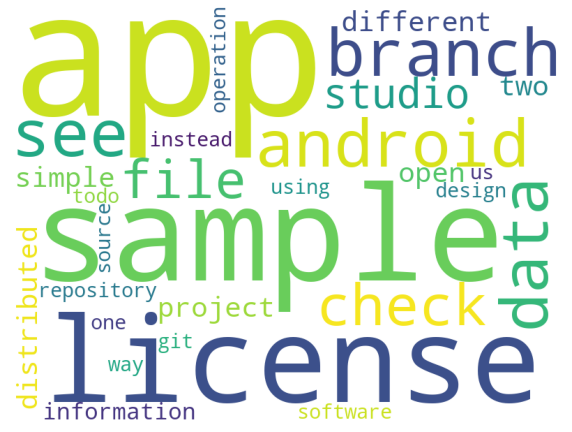

 
 ********************* Language : all_words *********************


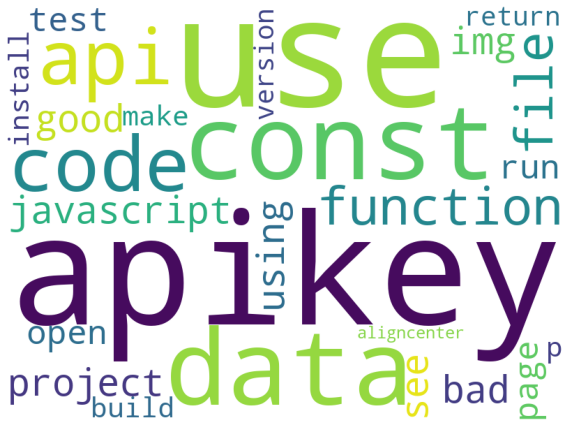

In [42]:
for col in word_counts.columns:
    print (f' ********************* Language : {col} *********************')
    wordcloud_top(word_counts, col)
    print(' ')

**- What does the distribution of IDFs look like for the most common words?**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
# # our 3 example documents
# documents = {
#     'news': 'Codeup announced last thursday that they just launched a new data science program. It is 18 weeks long.',
#     'description': 'Codeup\'s data science program teaches hands on skills using Python and pandas.',
#     'context': 'Codeup\'s data science program was created in response to a percieved lack of data science talent, and growing demand.'
# }
# print(documents)

# print('\nCleaning and lemmatizing...\n')

# documents = {topic: prep.lemmatize(prep.basic_clean(documents[topic])) for topic in documents}



In [45]:
# documents

In [46]:
# # A simple way to calculate idf for demonstration. Note that this
# # function relies on the globally defined documents variable.
# def idf(word):
#     n_occurences = sum([1 for doc in documents.values() if word in doc])
#     return len(documents) / n_occurences

# # Get a list of the unique words
# unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# # put the unique words into a data frame
# (pd.DataFrame(dict(word=unique_words))
#  # calculate the idf for each word
#  .assign(idf=lambda df: df.word.apply(idf))
#  # sort the data for presentation purposes
#  .set_index('word')
#  .sort_values(by='idf', ascending=False)
#  .head(5))

In [47]:
# # Get a list of the unique words
# pd.Series(' '.join(documents.values()).split()).unique()

In [48]:
#len(documents)

In [49]:
len(join_text)

15

In [50]:
join_text.pop("all_words")

'p aligncentera hrefhttpslaravelcom targetblankimg srchttpsrawgithubusercontentcomlaravelartmasterlogolockup520svg220cmyk120full20colorlaravellogolockupcmykredsvg width400ap p aligncenter hrefhttpstravisciorglaravelframeworkimg srchttpstravisciorglaravelframeworksvg altbuild statusa hrefhttpspackagistorgpackageslaravelframeworkimg srchttpsimgshieldsiopackagistdtlaravelframework alttotal downloadsa hrefhttpspackagistorgpackageslaravelframeworkimg srchttpsimgshieldsiopackagistvlaravelframework altlatest stable versiona hrefhttpspackagistorgpackageslaravelframeworkimg srchttpsimgshieldsiopackagistllaravelframework altlicensea p laravel laravel web application framework expressive elegant syntax believe development must enjoyable creative experience truly fulfilling laravel take pain development easing common task used many web project simple fast routing enginehttpslaravelcomdocsrouting powerful dependency injection containerhttpslaravelcomdocscontainer multiple backends sessionhttpslarav

In [51]:
join_text.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'C++', 'HTML', 'TypeScript', 'Ruby', 'Go', 'C', 'Vue', 'Shell', 'CSS', 'PHP', 'Kotlin'])

In [52]:
def idf(word):
    n_occurences = sum([1 for doc in join_text.values() if word in doc])
    return len(join_text) / n_occurences

In [53]:
# Get a list of the unique words
unique_words = pd.Series(' '.join(join_text.values()).split()).unique()

In [54]:
unique_words

array(['html5', 'boilerplatehttpshtml5boilerplatecom', 'build', ...,
       'asf', 'agreement', 'ownership'], dtype=object)

In [55]:
len(unique_words)

14026

In [56]:
#let's check a single word
idf('html5')

14.0

In [57]:
n_occurences = sum([1 for doc in join_text.values() if 'html5' in doc])
len(join_text) / n_occurences

14.0

In [58]:
#  how many texts  the word is in 
n_occurences

1

In [59]:
#total of texts 
len(join_text)

14

In [81]:
train

repo    language  \
39                     laravel/laravel         PHP   
66   jakevdp/PythonDataScienceHandbook      Python   
58                    pjreddie/darknet           C   
34                     macrozheng/mall        Java   
120  springframeworkguru/spring5webapp        Java   
..                                 ...         ...   
26        PanJiaChen/vue-element-admin         Vue   
97                   PX4/PX4-Autopilot         C++   
73    spring-projects/spring-petclinic        Java   
20               kubernetes/kubernetes          Go   
82                 angular/angular-cli  TypeScript   

                                       readme_contents  \
39   <p align="center"><a href="https://laravel.com...   
66   # Python Data Science Handbook\n\n[![Binder](h...   
58   ![Darknet Logo](http://pjreddie.com/media/file...   
34   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
120  # Spring Framework 5: Beginner to Guru\n\nThis...   
..                                                 ...   
26   <p align="center">\n  <img width="320" src="ht...   
97   # PX4 Drone Autopilot\n\n[![Releases](https://...   
73   # Spring PetClinic Sample Application [![Build...   
20   # Kubernetes (K8s)\n\n[![GoPkg Widget]][GoPkg]...   
82   <!--\n  BEFORE UPDATING THIS FILE, READ THIS.\...   

                                                 clean  \
39   p aligncentera hrefhttpslaravelcom targetblank...   
66   python data science handbook binderhttpsmybind...   
58   darknet logohttppjreddiecommediafilesdarknetbl...   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...   
120  spring framework 5 beginner guru repository ex...   
..                                                 ...   
26   p aligncenter img width320 srchttpswpimgwallst...   
97   px4 drone autopilot releaseshttpsimgshieldsiog...   
73   spring petclinic sample application build stat...   
20   kubernetes k8s gopkg widgetgopkg cii best prac...   
82   updating file read file automatically generate...   

                                               stemmed  \
39   p aligncentera hrefhttpslaravelcom targetblank...   
66   python data scienc handbook binderhttpsmybinde...   
58   darknet logohttppjreddiecommediafilesdarknetbl...   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...   
120  spring framework 5 beginn guru repositori exam...   
..                                                 ...   
26   p aligncent img width320 srchttpswpimgwallstcn...   
97   px4 drone autopilot releaseshttpsimgshieldsiog...   
73   spring petclin sampl applic build statushttpst...   
20   kubernet k8 gopkg widgetgopkg cii best practic...   
82   updat file read file automat gener releas impo...   

                                            lemmatized  readme_length  \
39   p aligncentera hrefhttpslaravelcom targetblank...           2871   
66   python data science handbook binderhttpsmybind...           2649   
58   darknet logohttppjreddiecommediafilesdarknetbl...           1887   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...           4941   
120  spring framework 5 beginner guru repository ex...           4905   
..                                                 ...            ...   
26   p aligncenter img width320 srchttpswpimgwallst...           7512   
97   px4 drone autopilot releaseshttpsimgshieldsiog...           5833   
73   spring petclinic sample application build stat...           5910   
20   kubernetes k8s gopkg widgetgopkg cii best prac...           2552   
82   updating file read file automatically generate...           8764   

     word_count  
39          225  
66          212  
58          123  
34          230  
120         438  
..          ...  
26          687  
97          376  
73          509  
20          219  
82          635  

[70 rows x 8 columns]

In [83]:
# put the unique words into a data frame
un_df =(pd.DataFrame(dict(word=unique_words))

 # calculate the idf for each word
.assign(idf=lambda train: train.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False))

SyntaxError: invalid syntax (<ipython-input-83-9d7f84012075>, line 5)

In [61]:
un_df

idf
word                              
html5                         14.0
tykhttpstykioopensource       14.0
webhttpccdbhemiolacom         14.0
projecthttpsctextorgtoolsapi  14.0
openaccess                    14.0
...                            ...
f                              1.0
x                              1.0
h                              1.0
star                           1.0
o                              1.0

[14026 rows x 1 columns]

In [62]:
#these are the words tht are only in one type of language text
un_df[un_df.idf==15]

Empty DataFrame
Columns: [idf]
Index: []

In [63]:
len(un_df[un_df.idf==15])

0

In [64]:
len(un_df)

14026

In [65]:
#we can see
len(un_df[un_df.idf==14]) /len(un_df)

0.7523171253386568

In [66]:
#almost 75 % of the unique words are in one language text

**- Does the length of the README vary by programming language?**

In [67]:
train['readme_length'] = train.lemmatized.apply(len)

In [68]:
train.head()

repo language  \
39                     laravel/laravel      PHP   
66   jakevdp/PythonDataScienceHandbook   Python   
58                    pjreddie/darknet        C   
34                     macrozheng/mall     Java   
120  springframeworkguru/spring5webapp     Java   

                                       readme_contents  \
39   <p align="center"><a href="https://laravel.com...   
66   # Python Data Science Handbook\n\n[![Binder](h...   
58   ![Darknet Logo](http://pjreddie.com/media/file...   
34   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
120  # Spring Framework 5: Beginner to Guru\n\nThis...   

                                                 clean  \
39   p aligncentera hrefhttpslaravelcom targetblank...   
66   python data science handbook binderhttpsmybind...   
58   darknet logohttppjreddiecommediafilesdarknetbl...   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...   
120  spring framework 5 beginner guru repository ex...   

                                               stemmed  \
39   p aligncentera hrefhttpslaravelcom targetblank...   
66   python data scienc handbook binderhttpsmybinde...   
58   darknet logohttppjreddiecommediafilesdarknetbl...   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...   
120  spring framework 5 beginn guru repositori exam...   

                                            lemmatized  readme_length  
39   p aligncentera hrefhttpslaravelcom targetblank...           2871  
66   python data science handbook binderhttpsmybind...           2649  
58   darknet logohttppjreddiecommediafilesdarknetbl...           1887  
34   mall p hrefimg srchttpmacroossosscnshenzhenali...           4941  
120  spring framework 5 beginner guru repository ex...           4905

In [69]:
train.groupby('language').readme_length.mean()


language
C              1583.333333
C++            4325.200000
CSS            5607.000000
Go             8623.500000
HTML           4964.000000
Java           4982.375000
JavaScript    11351.470588
Kotlin         4065.000000
PHP            2871.000000
Python        15172.142857
Ruby           2796.750000
Shell          4527.000000
TypeScript     7132.750000
Vue            8327.000000
Name: readme_length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

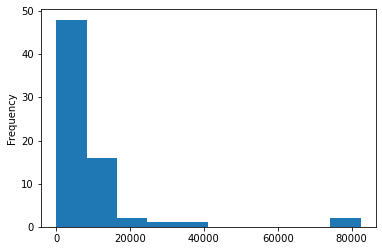

In [70]:
train.readme_length.plot.hist()

In [71]:
train['word_count'] = train.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

In [72]:
train.head()

repo language  \
39                     laravel/laravel      PHP   
66   jakevdp/PythonDataScienceHandbook   Python   
58                    pjreddie/darknet        C   
34                     macrozheng/mall     Java   
120  springframeworkguru/spring5webapp     Java   

                                       readme_contents  \
39   <p align="center"><a href="https://laravel.com...   
66   # Python Data Science Handbook\n\n[![Binder](h...   
58   ![Darknet Logo](http://pjreddie.com/media/file...   
34   # mall\n\n<p>\n  <a href="#公众号"><img src="http...   
120  # Spring Framework 5: Beginner to Guru\n\nThis...   

                                                 clean  \
39   p aligncentera hrefhttpslaravelcom targetblank...   
66   python data science handbook binderhttpsmybind...   
58   darknet logohttppjreddiecommediafilesdarknetbl...   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...   
120  spring framework 5 beginner guru repository ex...   

                                               stemmed  \
39   p aligncentera hrefhttpslaravelcom targetblank...   
66   python data scienc handbook binderhttpsmybinde...   
58   darknet logohttppjreddiecommediafilesdarknetbl...   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...   
120  spring framework 5 beginn guru repositori exam...   

                                            lemmatized  readme_length  \
39   p aligncentera hrefhttpslaravelcom targetblank...           2871   
66   python data science handbook binderhttpsmybind...           2649   
58   darknet logohttppjreddiecommediafilesdarknetbl...           1887   
34   mall p hrefimg srchttpmacroossosscnshenzhenali...           4941   
120  spring framework 5 beginner guru repository ex...           4905   

     word_count  
39          225  
66          212  
58          123  
34          230  
120         438

<Figure size 1080x720 with 0 Axes>

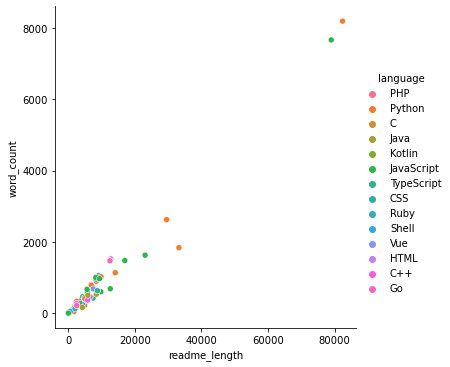

In [73]:
plt.figure(figsize= (15,10))
sns.relplot(data=train, y='word_count', x='readme_length', hue='language')
#plt.rc('figure',figsize=(10,10))
plt.show()

In [74]:
train.groupby('language').word_count.mean()

language
C              146.000000
C++            320.800000
CSS            615.000000
Go             994.500000
HTML           511.500000
Java           369.125000
JavaScript    1015.411765
Kotlin         389.000000
PHP            225.000000
Python        1348.571429
Ruby           228.500000
Shell          510.000000
TypeScript     495.500000
Vue            876.500000
Name: word_count, dtype: float64

In [75]:
train.groupby('language').word_count.median()

language
C              123.0
C++            363.0
CSS            615.0
Go            1141.0
HTML           253.0
Java           334.0
JavaScript     600.0
Kotlin         389.0
PHP            225.0
Python         845.0
Ruby           202.0
Shell          510.0
TypeScript     532.5
Vue            876.5
Name: word_count, dtype: float64

### Do different programming languages use a different number of unique words?

In [77]:
word_counts[word_counts.all_words ==1]

JavaScript  Python  Java  \
caplan                                                       1       0     0   
othiym23httpsgithubcomothiym23                               1       0     0   
name71a                                                      1       0     0   
nowhitespacebeforepropertyhttpseslintorgdocsrul...           1       0     0   
236namingfilenamematchesexport                               1       0     0   
...                                                        ...     ...   ...   
imran                                                        1       0     0   
aitchabee5                                                   1       0     0   
unzipping                                                    1       0     0   
hrefhttpsopencollectivecomsocketiobacker11website            1       0     0   
hrefhttpsopencollectivecomsocketiobacker8website             1       0     0   

                                                    C++  HTML  TypeScript  \
caplan                                                0     0           0   
othiym23httpsgithubcomothiym23                        0     0           0   
name71a                                               0     0           0   
nowhitespacebeforepropertyhttpseslintorgdocsrul...    0     0           0   
236namingfilenamematchesexport                        0     0           0   
...                                                 ...   ...         ...   
imran                                                 0     0           0   
aitchabee5                                            0     0           0   
unzipping                                             0     0           0   
hrefhttpsopencollectivecomsocketiobacker11website     0     0           0   
hrefhttpsopencollectivecomsocketiobacker8website      0     0           0   

                                                    Ruby  Go  C  Vue  Shell  \
caplan                                                 0   0  0    0      0   
othiym23httpsgithubcomothiym23                         0   0  0    0      0   
name71a                                                0   0  0    0      0   
nowhitespacebeforepropertyhttpseslintorgdocsrul...     0   0  0    0      0   
236namingfilenamematchesexport                         0   0  0    0      0   
...                                                  ...  .. ..  ...    ...   
imran                                                  0   0  0    0      0   
aitchabee5                                             0   0  0    0      0   
unzipping                                              0   0  0    0      0   
hrefhttpsopencollectivecomsocketiobacker11website      0   0  0    0      0   
hrefhttpsopencollectivecomsocketiobacker8website       0   0  0    0      0   

                                                    CSS  PHP  Kotlin  \
caplan                                                0    0       0   
othiym23httpsgithubcomothiym23                        0    0       0   
name71a                                               0    0       0   
nowhitespacebeforepropertyhttpseslintorgdocsrul...    0    0       0   
236namingfilenamematchesexport                        0    0       0   
...                                                 ...  ...     ...   
imran                                                 0    0       0   
aitchabee5                                            0    0       0   
unzipping                                             0    0       0   
hrefhttpsopencollectivecomsocketiobacker11website     0    0       0   
hrefhttpsopencollectivecomsocketiobacker8website      0    0       0   

                                                    all_words  
caplan                                                      1  
othiym23httpsgithubcomothiym23                              1  
name71a                                                     1  
nowhitespacebeforepropertyhttpseslintorgdocsrul...          1  
236namingfilenamematchesexport  

In [80]:
word_counts[word_counts.all_words ==1].sum()

JavaScript    3276
Python           0
Java             0
C++              0
HTML             0
TypeScript       0
Ruby             0
Go               0
C                0
Vue              0
Shell            0
CSS              0
PHP              0
Kotlin           0
all_words     3276
dtype: int64

In [88]:
# Get a list of the unique words per language
unique_words

array(['html5', 'boilerplatehttpshtml5boilerplatecom', 'build', ...,
       'asf', 'agreement', 'ownership'], dtype=object)

In [109]:
uniq_words={}
# Get a list of the unique words
for key in join_text:
    uniq_words [key] =  list(pd.Series(join_text[key].split()).unique())
    


In [118]:
uniq_words

{'JavaScript': ['html5',
  'boilerplatehttpshtml5boilerplatecom',
  'build',
  'statushttpsgithubcomh5bphtml5boilerplateworkflowsbuild20statusbadgesvghttpsgithubcomh5bphtml5boilerplateactionsqueryworkflow3a22buildstatus22branch3amaster',
  'licensehttpsimgshieldsiobadgelicensemitlightgreysvghttpsgithubcomh5bphtml5boilerplateblobmasterlicensetxt',
  'devdependency',
  'statushttpsdaviddmorgh5bphtml5boilerplatedevstatussvghttpsdaviddmorgh5bphtml5boilerplateinfodevdependencies',
  'npm',
  'downloadshttpsimgshieldsionpmdthtml5boilerplatesvghttpswwwnpmjscompackagehtml5boilerplate',
  'githubstarsimagehttpsimgshieldsiogithubstarsh5bphtml5boilerplatesvglabelgithub20starshttpsgithubcomh5bphtml5boilerplate',
  'boilerplate',
  'professional',
  'frontend',
  'template',
  'building',
  'fast',
  'robust',
  'adaptable',
  'web',
  'apps',
  'site',
  'project',
  'product',
  '10',
  'year',
  'iterative',
  'development',
  'community',
  'knowledge',
  'impose',
  'specific',
  'philosophy',

In [119]:
len(uniq_words['JavaScript'])

5754

In [121]:
#vizualizacion most frequet words
def word_cloud (text):

    plt.figure(figsize=(10,10))
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

5

******************************UNIQUE WORDS FOR JavaScript ***************************** 


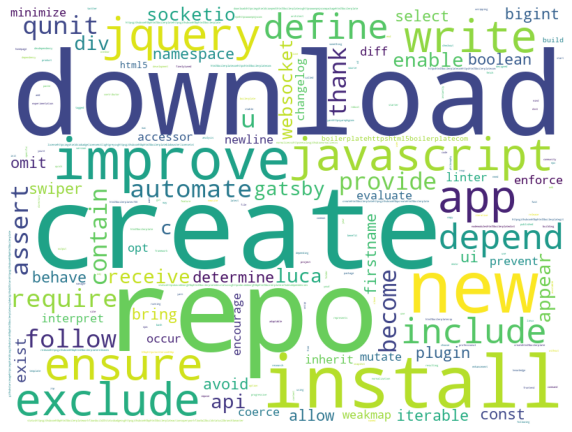

******************************UNIQUE WORDS FOR Python ***************************** 


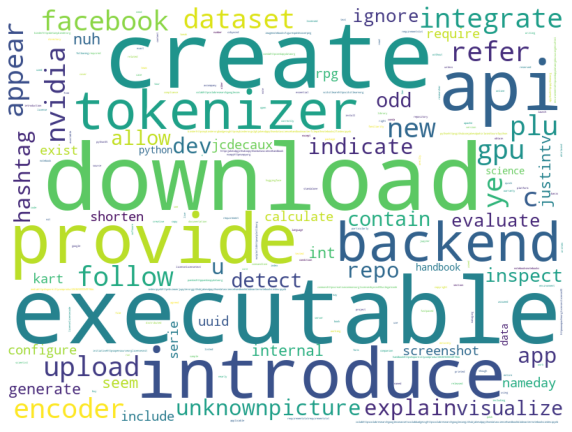

******************************UNIQUE WORDS FOR Java ***************************** 


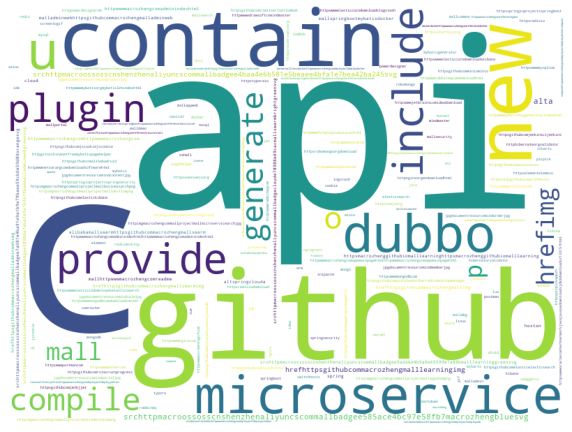

******************************UNIQUE WORDS FOR C++ ***************************** 


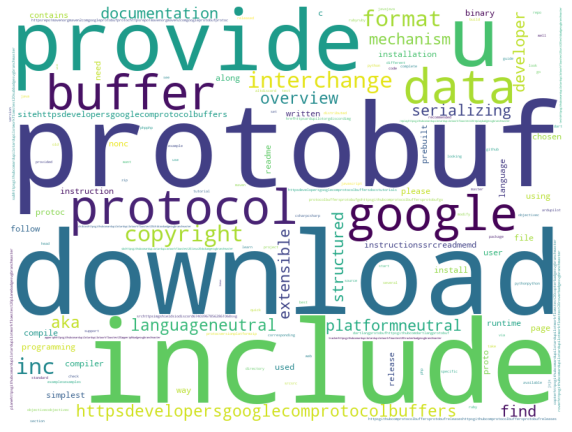

******************************UNIQUE WORDS FOR HTML ***************************** 


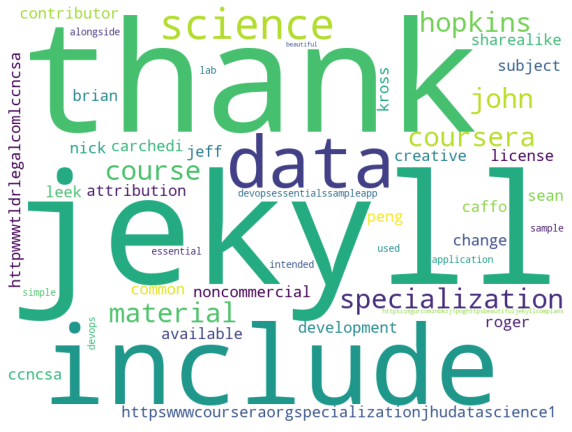

******************************UNIQUE WORDS FOR TypeScript ***************************** 


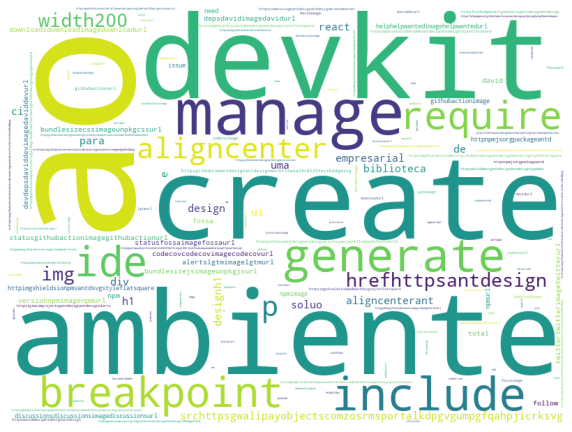

******************************UNIQUE WORDS FOR Ruby ***************************** 


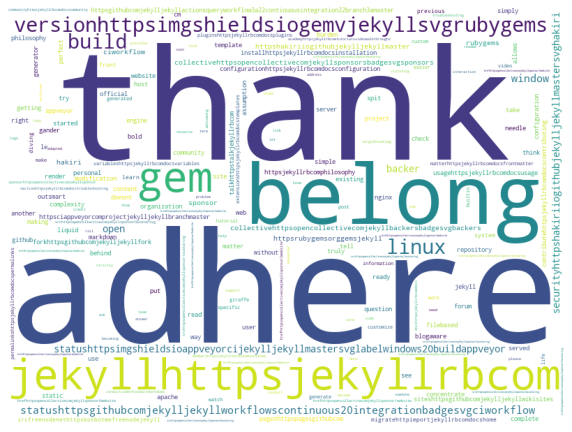

******************************UNIQUE WORDS FOR Go ***************************** 


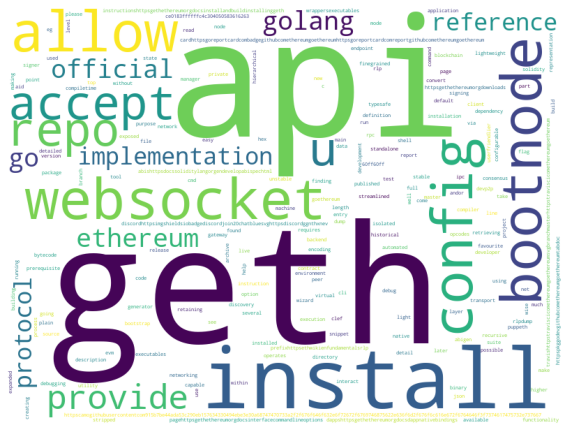

******************************UNIQUE WORDS FOR C ***************************** 


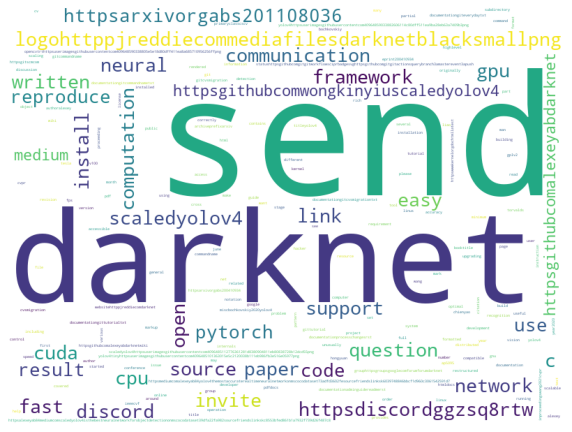

******************************UNIQUE WORDS FOR Vue ***************************** 


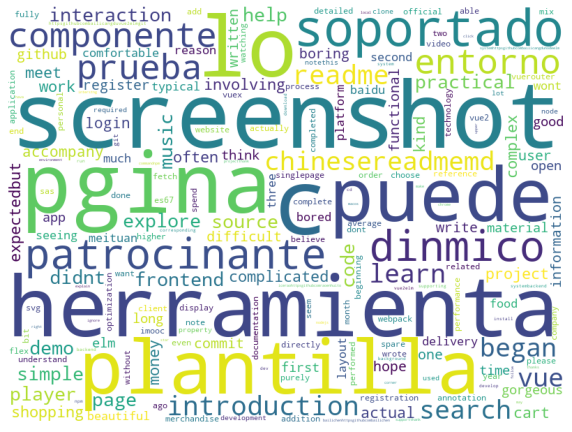

******************************UNIQUE WORDS FOR Shell ***************************** 


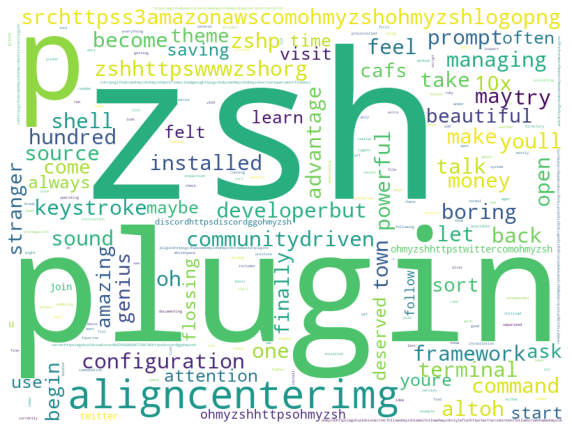

******************************UNIQUE WORDS FOR CSS ***************************** 


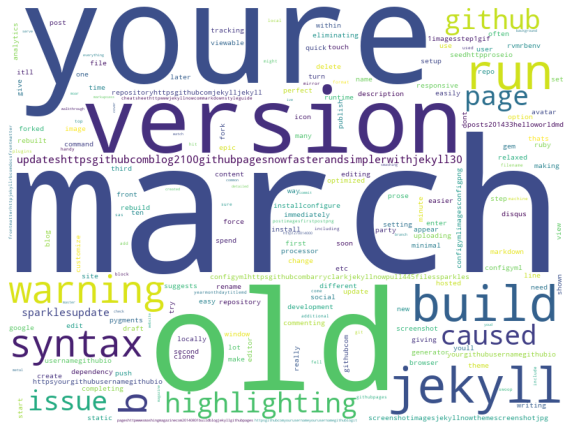

******************************UNIQUE WORDS FOR PHP ***************************** 


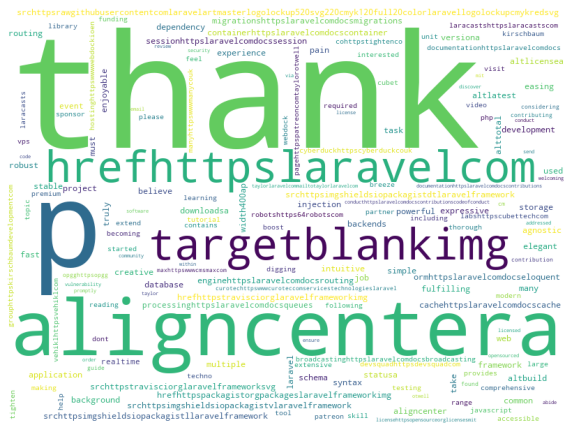

******************************UNIQUE WORDS FOR Kotlin ***************************** 


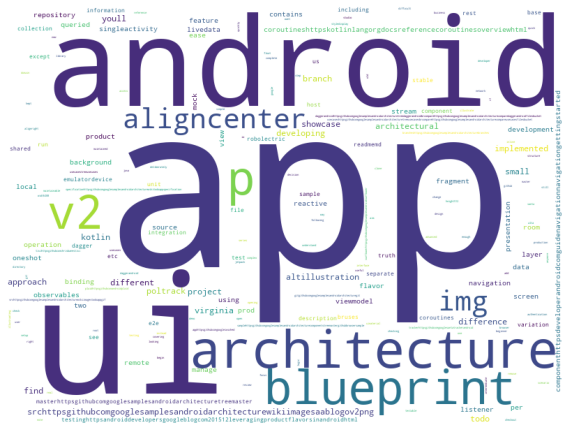

In [123]:
for key in uniq_words:    
    print(f'******************************UNIQUE WORDS FOR {key} ***************************** ')
    word_cloud (' '.join(uniq_words[key]))

In [126]:
len_uniq_df={}
for key in uniq_words:
    len_uniq_df[key] = len(uniq_words[key])
    

In [127]:
len_uniq_df

{'JavaScript': 5754,
 'Python': 6044,
 'Java': 1396,
 'C++': 719,
 'HTML': 881,
 'TypeScript': 775,
 'Ruby': 592,
 'Go': 1063,
 'C': 291,
 'Vue': 907,
 'Shell': 509,
 'CSS': 360,
 'PHP': 175,
 'Kotlin': 250}